In [18]:
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
import re
# fig,ax=plt.subplots()
# fig.savefig('test.svg', format='svg')

In [19]:
src = r'\\kukissd\research\Database\MEF micropattern matfiles\out'
folders = [os.path.join(src,_) for _ in os.listdir(src)]

In [20]:
avg_inertias = []
cluster_nums = []
for folder in folders:
    root,foldername=os.path.split(folder)
    csvsrc = os.path.join(folder,'Result based on '+foldername)
    csvs = [os.path.join(csvsrc,_) for _ in os.listdir(csvsrc) if _.endswith('csv')]

    inertias = []
    for csv in csvs:
        df = pd.read_csv(csv)
        for mode in np.unique(df['Shape mode']):
            dist = df[df['Shape mode']==mode]['Distance from cluster center']
            dist = dist[dist<100]
            dist_sum = np.sum(dist**2)
            inertias.append(dist_sum)
    avg_inertia = np.mean(inertias)
    avg_inertias.append(avg_inertia)
    cluster_num = int(re.findall(r"(\d+)_", foldername)[0])
    cluster_nums.append(cluster_num)

In [21]:
avg_inertias

[2812.408732727273,
 2812.8011463636362,
 2814.3737463636367,
 2813.5512081818183,
 2814.361324545455,
 2815.3748836363634,
 2814.246913636363,
 2814.772734545455,
 2814.081759090909,
 2812.9261672727266,
 1851.1761387878785,
 1850.8875163636367,
 1850.9560654545453,
 1850.9009872727272,
 1850.594541212121,
 1850.7208442424242,
 1851.2107987878787,
 1850.7948575757578,
 1850.945246060606,
 1850.9178036363633,
 1374.8807959090907,
 1374.665694090909,
 1374.3608854545455,
 1374.7534677272727,
 1374.7058654545453,
 1374.579864090909,
 1374.2567763636364,
 1374.2401599999998,
 1374.2417759090908,
 1374.5383463636363,
 1091.8395258181818,
 1091.2655141818182,
 1091.3618847272728,
 1091.9308534545455,
 1091.814634909091,
 1091.5722123636363,
 1092.1537516363635,
 1091.241808,
 1091.5172098181815,
 1090.8911621818183,
 14975.565499999999,
 14951.428327272726,
 14951.260909090912,
 14951.492613636365,
 14951.163381818185,
 14951.304636363637,
 14951.138868181819,
 14951.53132272727,
 14951.153

In [39]:
avg_inertias2 = np.around(np.array(avg_inertias)/1000,decimals=4)

In [40]:
avg_inertias2

array([ 2.8124,  2.8128,  2.8144,  2.8136,  2.8144,  2.8154,  2.8142,
        2.8148,  2.8141,  2.8129,  1.8512,  1.8509,  1.851 ,  1.8509,
        1.8506,  1.8507,  1.8512,  1.8508,  1.8509,  1.8509,  1.3749,
        1.3747,  1.3744,  1.3748,  1.3747,  1.3746,  1.3743,  1.3742,
        1.3742,  1.3745,  1.0918,  1.0913,  1.0914,  1.0919,  1.0918,
        1.0916,  1.0922,  1.0912,  1.0915,  1.0909, 14.9756, 14.9514,
       14.9513, 14.9515, 14.9512, 14.9513, 14.9511, 14.9515, 14.9512,
       14.9512,  0.9043,  0.9043,  0.9045,  0.9041,  0.9043,  0.904 ,
        0.9042,  0.9039,  0.9039,  0.9044,  0.7713,  0.7716,  0.7708,
        0.7712,  0.7708,  0.7713,  0.7707,  0.7707,  0.7704,  0.7712,
        5.7559,  5.7559,  5.756 ,  5.756 ,  5.7559,  5.756 ,  5.7561,
        5.7561,  5.7559,  5.7559])

In [24]:
np.array(cluster_nums)

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 25,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 35, 35, 35, 35, 35, 35, 35, 35,
       35, 35,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5])

In [25]:
avg_inertias3 = [x for _,x in sorted(zip(cluster_nums,avg_inertias2))]
cluster_nums2 = sorted(cluster_nums)

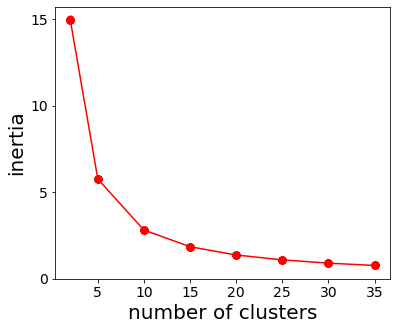

In [38]:
fig,ax=plt.subplots(figsize=(6,5))
ax.scatter(cluster_nums,avg_inertias2,c='r',marker='o',s=50)
ax.plot(cluster_nums2,avg_inertias3,c='r')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_yticks([0,5,10,15])
ax.set_xlabel('number of clusters', fontsize=20)
ax.set_ylabel('inertia', fontsize=20)
fig.savefig('test.svg', format='svg')